# Exploring Disney Land Wait Time Data Set

In [1]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import Series

#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')

In [2]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [3]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


In [4]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [5]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [6]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [7]:
#avg of posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])
sum_by_day.head()

,date,SPOSTMIN
0,2012-01-01,37.727273
1,2012-01-02,43.750000
2,2012-01-03,5.000000
3,2012-01-04,17.142857
4,2012-01-05,41.153846


In [8]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
3,2012-01-04,17.142857,NaN,4,3,1,1,2012,CHRISTMAS,4,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN
4,2012-01-05,41.153846,NaN,5,4,1,1,2012,CHRISTMAS,5,...,1,1,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN


In [9]:
#fill na for new meta splash data
meta_splash2 = meta_splash2.fillna(0)
meta_splash2.head(100)

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
5,2012-01-06,37.666667,0,6,5,1,1,2012,CHRISTMAS,6,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
6,2012-01-07,25.625000,0,7,6,1,1,2012,CHRISTMAS,7,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
7,2012-01-08,18.043478,0,1,7,2,1,2012,CHRISTMAS,8,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
8,2012-01-09,53.500000,0,2,8,2,1,2012,CHRISTMAS,8,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0
9,2012-01-10,32.307692,0,3,9,2,1,2012,WINTER,7,...,1,1,15:45,0.0,Mickey's Jammin' Jungle Parade,0.0,0,0,0,0


## Wait Time vs Parade and Firework Times (HOURLY DATA)

See how wait times differ the hours before, during, and after a parade and firework time

In [10]:
#meta_splash2 = posted weighted times daily
meta_splash2.head(50)
#focusing on magic kingdom park's parades/fireworks
meta_splash2.MKPRDDAY.count()

2381

In [11]:
#dropping columns that are outside of magic kingdom in meta_splash2
meta_splash2 = meta_splash2.drop(['EPFIREWK','EPFIRET1','EPFIRET2','EPFIREN','HSPRDDAY','HSPRDDT1','HSPRDDN','HSFIREWK','HSFIRET1','HSFIRET2','HSFIREN','HSSHWNGT','HSSHWNT1','HSSHWNT2','HSSHWNN','HSFIREWKS','AKPRDDAY','AKPRDDT1','AKPRDDT2','AKPRDDN','AKFIREN','AKSHWNGT','AKSHWNT1','AKSHWNT2','AKSHWNN'], axis=1)

In [12]:
#data with parade/firework time for magic kingdom
meta_splash2.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,MKPRDDT2,MKPRDDN,MKPRDNGT,MKPRDNT1,MKPRDNT2,MKPRDNN,MKFIREWK,MKFIRET1,MKFIRET2,MKFIREN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,0,Celebrate A Dream Come True Parade,2,20:00,22:00,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,0,Celebrate A Dream Come True Parade,1,20:00,0,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,0,Celebrate A Dream Come True Parade,1,20:00,0,Main Street Electrical Parade,1,21:00,0,Wishes Nighttime Spectacular


In [21]:
#DAY TIME PARADES

#3 unique day parades: Celebrate A Dream Come True Parade
#Mickey's Once Upon a Christmastime Parade
#Disney Festival of Fantasy Parade

#separated each parade
dream = meta_splash2[meta_splash2.MKPRDDN == 'Celebrate A Dream Come True Parade']
xmastime = meta_splash2[meta_splash2.MKPRDDN == "Mickey's Once Upon a Christmastime Parad"]
fantasy = meta_splash2[meta_splash2.MKPRDDN == 'Disney Festival of Fantasy Parade']

#drop night time parades
dream = dream.drop(['MKPRDNGT','MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2','MKFIREN'], axis = 1)
xmastime = xmastime.drop(['MKPRDNGT','MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2','MKFIREN'], axis = 1)
fantasy = fantasy.drop(['MKPRDNGT','MKPRDNT1','MKPRDNT2','MKPRDNN','MKFIREWK','MKFIRET1','MKFIRET2','MKFIREN'], axis = 1)

#number of each parad in total by day
dream.count() #633 instances
xmastime.count() #74 instances...Parade is spelled wrong in dataset
fantasy.count() #1,673 instances
meta_splash2['MKPRDDAY'].count() # = 2381 total day time parades / day


dream.head()

,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,CapacityLostWGT_MK,CapacityLostWGT_EP,CapacityLostWGT_HS,CapacityLostWGT_AK,EP09CAPACITY,HS20CAPACITY,MKPRDDAY,MKPRDDT1,MKPRDDT2,MKPRDDN
0,2012-01-01,37.727273,0,1,0,1,1,2012,CHRISTMAS PEAK,0,...,10896411,11890812,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade
1,2012-01-02,43.750000,0,2,1,1,1,2012,CHRISTMAS,2,...,10896411,11890812,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade
2,2012-01-03,5.000000,0,3,2,1,1,2012,CHRISTMAS,3,...,10896411,11890812,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade
3,2012-01-04,17.142857,0,4,3,1,1,2012,CHRISTMAS,4,...,10896411,11890812,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade
4,2012-01-05,41.153846,0,5,4,1,1,2012,CHRISTMAS,5,...,10896411,11890812,8916209,6931107,1600,1000,1,15:00,0,Celebrate A Dream Come True Parade


In [31]:
#See how wait times differ the hours before, during, and after a parade
#avg wait times for splash mountain by hours 1st day parade begins
hourly_wait = dream.groupby('MKPRDDT1')['SPOSTMIN'].mean()

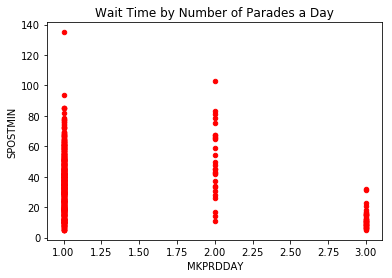

In [40]:
dream.plot(kind='scatter',x='MKPRDDAY',y='SPOSTMIN',color='red')
plt.title('Wait Time by Number of Parades a Day')
plt.show()

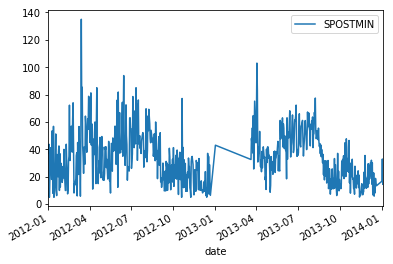

In [42]:
#time series plot of wait time compared to date
dream.plot.line(x='date', y='SPOSTMIN')

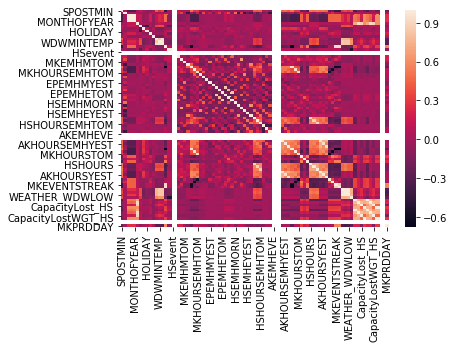

In [56]:
sns.heatmap(dream.corr()) #heat map correlation

In [68]:
pd.pivot_table(dream, values='SPOSTMIN', index=['MKPRDDT1'], columns='MONTHOFYEAR')

MONTHOFYEAR,1,2,3,4,5,6,7,8,9,10,11,12
MKPRDDT1,,,,,,,,,,,,
12:30,23.015780,NaN,52.140581,54.533360,47.486188,NaN,72.274845,NaN,NaN,NaN,NaN,NaN
15:00,27.566048,31.612636,47.072080,35.791923,36.424734,48.521213,49.586480,44.975264,20.650184,25.527568,18.268863,15.921806
15:30,6.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.119048,22.668478


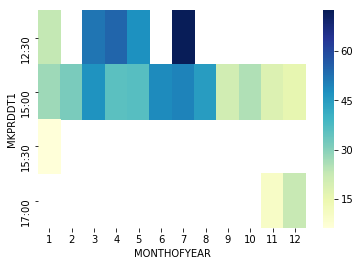

In [76]:
#heat map of wait times during each month and time of 1st parade
ax = pd.pivot_table(dream, values='SPOSTMIN', index=['MKPRDDT1'], columns='MONTHOFYEAR')
sns.heatmap(ax, cmap="YlGnBu")

In [ ]:
#NIGHT TIME PARADES

#2 parades: Main Street Electrical Parade, Mickey's "Boo-to-You" Halloween Parade, 

In [45]:
#FIREWORKS
